In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots

import sys
sys.path.append("../../../src/")
import nanonets_utils
import nanonets

plt.style.use(["science","bright"])

In [7]:
N_p                 = 9
outputs             = pd.read_csv(f"Nx={N_p}_Ny={N_p}_Nz=1_Ne=8.csv")
network_currents    = pd.read_csv(f"net_currents_Nx={N_p}_Ny={N_p}_Nz=1_Ne=8.csv")
states              = pd.read_csv(f"mean_state_Nx={N_p}_Ny={N_p}_Nz=1_Ne=8.csv")*1000
N_voltages          = len(outputs)
time_step           = 1e-10
time_steps          = time_step*np.arange(N_voltages)*1e9
outputs

,E0,E1,E2,E3,E4,E5,E6,E7,G,Eq_Jumps,Jumps,Current,Error
0,0.010000,0.0,-0.02,0.0,0.010000,0.05,0.0,0.007419,0.0,0.0,1.198,0.007419,0.000754
1,0.009992,0.0,-0.02,0.0,0.010000,0.05,0.0,0.004329,0.0,0.0,1.152,0.004329,0.000590
2,0.009968,0.0,-0.02,0.0,0.010000,0.05,0.0,0.003854,0.0,0.0,1.102,0.003854,0.000546
3,0.009928,0.0,-0.02,0.0,0.010000,0.05,0.0,0.003592,0.0,0.0,1.102,0.003592,0.000516
4,0.009872,0.0,-0.02,0.0,0.010000,0.05,0.0,0.003623,0.0,0.0,1.078,0.003623,0.000511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.007125,0.0,-0.02,0.0,-0.008423,0.05,0.0,0.018797,0.0,0.0,1.224,0.018797,0.000303
9995,-0.006839,0.0,-0.02,0.0,-0.008418,0.05,0.0,0.018853,0.0,0.0,1.190,0.018853,0.000300
9996,-0.006542,0.0,-0.02,0.0,-0.008412,0.05,0.0,0.018876,0.0,0.0,1.192,0.018876,0.000297
9997,-0.006234,0.0,-0.02,0.0,-0.008407,0.05,0.0,0.018855,0.0,0.0,1.326,0.018855,0.000296


Text(0, 0.5, '$y$ [mV]')

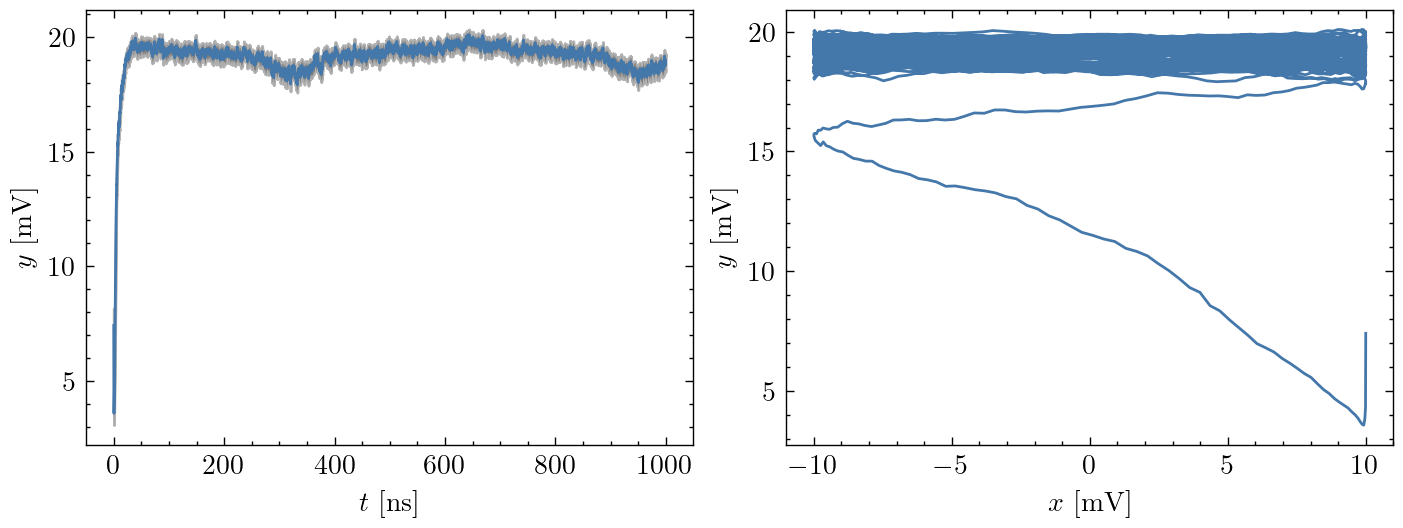

In [8]:
start   = 0
t       = time_steps[start:]
x       = outputs.loc[start:,'E0'].values*1000
y       = outputs.loc[start:,'Current'].values*1000
y_e     = outputs.loc[start:,'Error'].values*1000

fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax1  = fig.add_subplot(1,2,1)
ax2  = fig.add_subplot(1,2,2)

ax1.plot(t, y)
ax1.fill_between(t, y-y_e, y+y_e, interpolate=False, alpha=0.3, color='black')
ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$y$ [mV]")

ax2.plot(x, y)
ax2.set_xlabel("$x$ [mV]")
ax2.set_ylabel("$y$ [mV]")

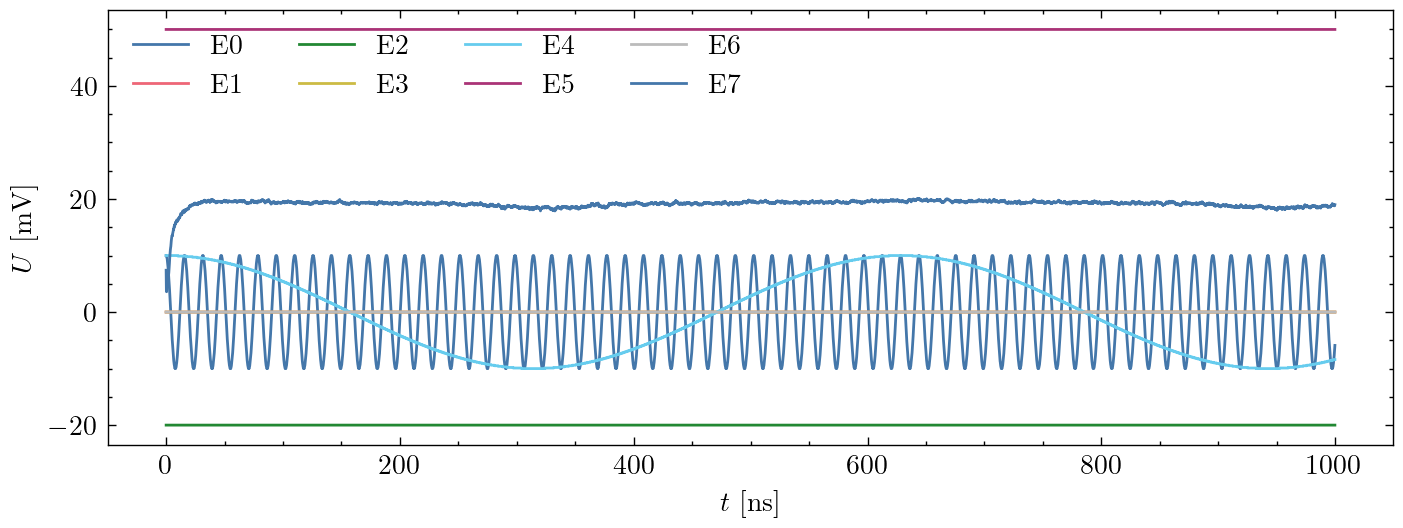

In [9]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot()

for i in range(8):
    ax.plot(t, outputs.loc[start:,f"E{i}"].round(4).values*1000, label=f'E{i}')

ax.set_xlabel("$t$ [ns]")
ax.set_ylabel("$U$ [mV]")
ax.legend(ncol=4, loc='upper left')

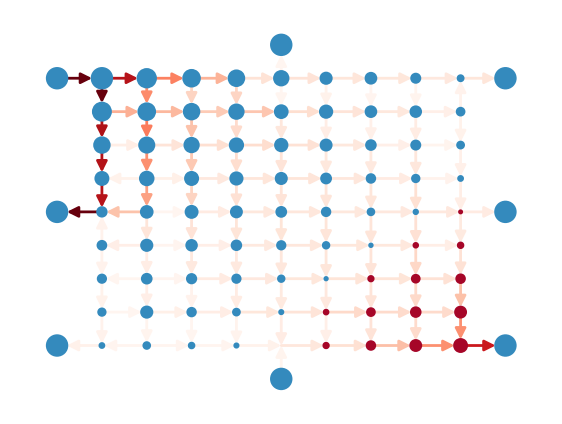

In [26]:
topology_parameter  = {
    "Nx"                : N_p,
    "Ny"                : N_p,
    "Nz"                : 1,
    "e_pos"             : [[(N_p-1)//2,0,0],[0,0,0],[N_p-1,0,0],[0,(N_p-1)//2,0],
                           [N_p-1,(N_p-1)//2,0],[0,N_p-1,0],[N_p-1,N_p-1,0],[(N_p-1)//2,N_p-1,0]],
    "electrode_type"    : ['constant','constant','constant','constant','constant','constant','constant','floating']
}
sim_class   = nanonets.simulation(topology_parameter=topology_parameter)
pos         = sim_class.pos
fig         = plt.figure(dpi=200)
ax          = fig.add_subplot()
fig, ax     = nanonets_utils.display_network_currents(df=network_currents, row=(2000,10000), N_electrodes=8, charge_landscape=states,
                                                      fig=fig, ax=ax, node_size=50, position_by_currents=False, pos=pos, arrowsize=8)